In [17]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import tensorflowjs as tfjs
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pipeline.prepare import prepare_data_tfds, prepare_data_kaggle
from pipeline.model import create_model
from pipeline.evaluate import plot_learning_curves

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/61225 [00:00<?, ? examples/s]

Shuffling the300w_lp-train.tfrecord...:   0%|          | 0/61225 [00:00<?, ? examples/s]

Dataset the300w_lp downloaded and prepared to /home/dana_shmaria/tensorflow_datasets/the300w_lp/1.0.0. Subsequent calls will reuse this data.


,color_params,exp_params,illum_params,image,landmarks_2d,landmarks_3d,landmarks_origin,pose_params,roi,shape_params,tex_params
0,"ndarray(shape=(7,), dtype=float32)","ndarray(shape=(29,), dtype=float32)","ndarray(shape=(10,), dtype=float32)",,"ndarray(shape=(68, 2), dtype=float32)","ndarray(shape=(68, 2), dtype=float32)","ndarray(shape=(68, 2), dtype=float32)","ndarray(shape=(7,), dtype=float32)","ndarray(shape=(4,), dtype=float32)","ndarray(shape=(199,), dtype=float32)","ndarray(shape=(199,), dtype=float32)"
1,"ndarray(shape=(7,), dtype=float32)","ndarray(shape=(29,), dtype=float32)","ndarray(shape=(10,), dtype=float32)",,"ndarray(shape=(68, 2), dtype=float32)","ndarray(shape=(68, 2), dtype=float32)","ndarray(shape=(68, 2), dtype=float32)","ndarray(shape=(7,), dtype=float32)","ndarray(shape=(4,), dtype=float32)","ndarray(shape=(199,), dtype=float32)","ndarray(shape=(199,), dtype=float32)"
2,"ndarray(shape=(7,), dtype=float32)","ndarray(shape=(29,), dtype=float32)","ndarray(shape=(10,), dtype=float32)",,"ndarray(shape=(68, 2), dtype=float32)","ndarray(shape=(68, 2), dtype=float32)","ndarray(shape=(68, 2), dtype=float32)","ndarray(shape=(7,), dtype=float32)","ndarray(shape=(4,), dtype=float32)","ndarray(shape=(199,), dtype=float32)","ndarray(shape=(199,), dtype=float32)"
3,"ndarray(shape=(7,), dtype=float32)","ndarray(shape=(29,), dtype=float32)","ndarray(shape=(10,), dtype=float32)",,"ndarray(shape=(68, 2), dtype=float32)","ndarray(shape=(68, 2), dtype=float32)","ndarray(shape=(68, 2), dtype=float32)","ndarray(shape=(7,), dtype=float32)","ndarray(shape=(4,), dtype=float32)","ndarray(shape=(199,), dtype=float32)","ndarray(shape=(199,), dtype=float32)"

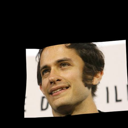
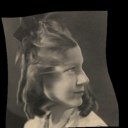
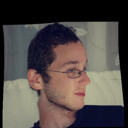
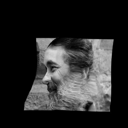

In [4]:
ds, info = tfds.load('the300w_lp', split='train', with_info=True)
tfds.as_dataframe(ds.take(4), info)

In [33]:
x, y = prepare_data_tfds('the300w_lp', 'landmarks_3d', 500)

In [51]:
y[0]

array([170.33663392, 296.5200305 , 175.11346042, 318.50451529,
       181.75259829, 338.48037422, 186.61888987, 356.68718219,
       189.96206224, 375.17433465, 192.62997508, 385.19533575,
       194.89048719, 386.59185469, 202.07868665, 384.78206098,
       221.70986831, 379.03942466, 249.31245446, 367.02315509,
       275.68720579, 356.9942683 , 298.03813398, 346.78454697,
       314.59001899, 330.07915914, 320.74249685, 308.3068639 ,
       322.42150605, 287.7051115 , 323.24177921, 265.52753448,
       322.34967649, 242.17536449, 142.32092053, 251.7499119 ,
       142.55745113, 239.53768015, 148.1775105 , 231.59885108,
       155.94929159, 228.1989634 , 164.54927176, 227.2436142 ,
       202.4337709 , 213.37519884, 212.62827069, 207.33018368,
       226.03908777, 203.45620215, 242.42564142, 203.38397026,
       260.03925204, 208.91546309, 185.60573906, 240.11432827,
       182.16528296, 252.04069018, 178.62912565, 263.76154125,
       179.49731648, 275.13601184, 181.91272616, 294.72

In [45]:
x[0][305]

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       ...,
       [97., 92., 88.],
       [55., 54., 52.],
       [26., 26., 26.]])

In [46]:
model = create_model((450,450,3), 136)

In [50]:
history = model.fit(x, y, batch_size=50, epochs=25, validation_split = 0.2)

Epoch 1/25
8/8 [==============================] - 46s 6s/step - loss: 1330.3569 - acc: 0.2500 - val_loss: 18624.4102 - val_acc: 0.3200
Epoch 2/25
8/8 [==============================] - 45s 6s/step - loss: 1199.5316 - acc: 0.2100 - val_loss: 15862.3203 - val_acc: 0.2900
Epoch 3/25
8/8 [==============================] - 46s 6s/step - loss: 1126.8534 - acc: 0.1925 - val_loss: 12017.6924 - val_acc: 0.4900
Epoch 4/25
8/8 [==============================] - 46s 6s/step - loss: 1043.2058 - acc: 0.2575 - val_loss: 9494.4922 - val_acc: 0.3000
Epoch 5/25
8/8 [==============================] - 46s 6s/step - loss: 1006.4083 - acc: 0.2000 - val_loss: 8695.8711 - val_acc: 0.5800
Epoch 6/25
8/8 [==============================] - 46s 6s/step - loss: 923.6206 - acc: 0.2150 - val_loss: 6626.2251 - val_acc: 0.4400
Epoch 7/25
8/8 [==============================] - 46s 6s/step - loss: 915.2177 - acc: 0.2400 - val_loss: 6351.1475 - val_acc: 0.4000
Epoch 8/25
8/8 [==============================] - 46s 6s/step

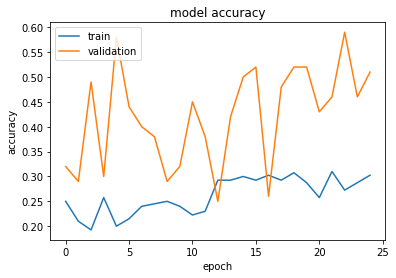

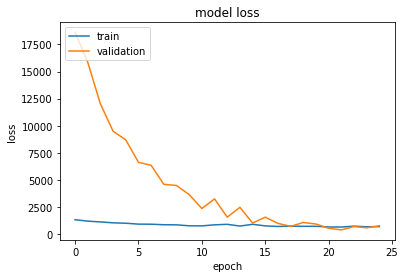

In [52]:
plot_learning_curves(history)

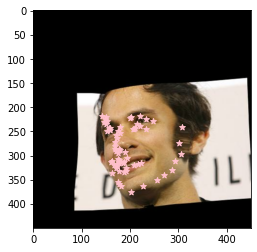

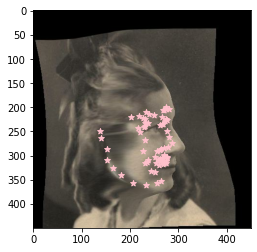

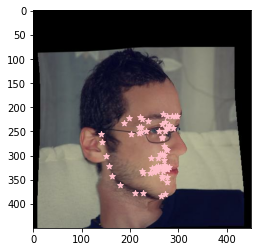

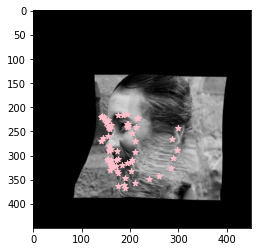

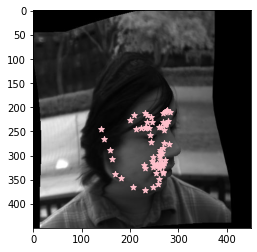

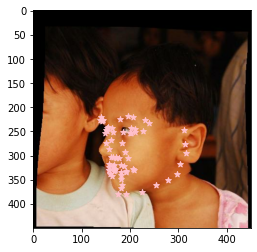

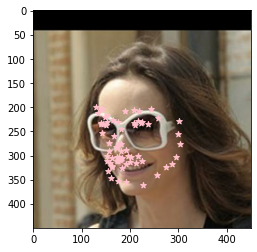

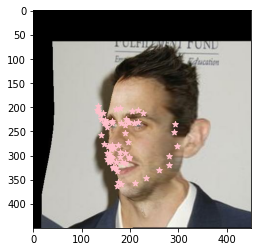

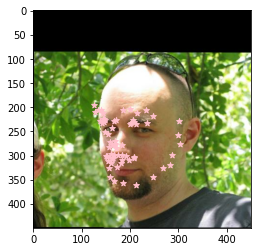

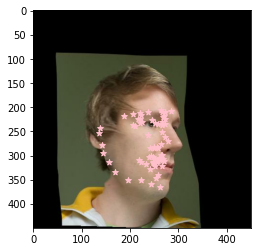

In [53]:
predicts = model.predict(x[:10])
for i in range(len(predicts)):
    plt.imshow(np.uint8(x[i]))
    plt.scatter(predicts[i][0::2], predicts[i][1::2], c='Pink', marker='*')
    plt.show()

In [54]:
tfjs.converters.save_keras_model(model, 'deepmoji_tfjs_300w_lp')